## МОДУЛЬ ПРЕДНАЗНАЧЕН ДЛЯ ФОРМИРОВАНИЯ 2D ГРАФИКОВ С СДАННЫМИ ПОСТУПАЮЩИМИ С МИКРОСХЕМЫ СЕНСОРА - ГИРОСКОПА, АКСЕЛЕРОМЕТРА, МАГНИТОМЕТРА
---

### Блок импорта библиотек необходимых для работы с 2D графиками

In [1]:
# Подключить библиотеки для мат обработки данных и генерации случайных данных
import numpy as np
import random
import math
# Подключить библиотеки для работы с 2D графиками и анимации
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter
import matplotlib.animation as an
# Подключить библиотеки для работы с датой/временем
from datetime import datetime

### Блок настроек среды исполнения Jupyter lab

In [2]:
#%matplotlib  widget
%matplotlib  inline

### Блок разработки функции создания фигуры в терминологии Matplotlib

In [9]:
# Функция CreateVectorFigure принимает ряд аргументов, в соответствии ними возвращает фигуру с созданными
# и настроенными графиками. Особенность функции - она специфичным способом компонует графики:
#               ВСЕ ГРАФИКИ БУДУТ ВЫСТРОЕНЫ В ОДИН ВЕРТИКАЛЬНЫЙ СТОЛБЕЦ, ПО ОДНОМУ ГРАФИКУ В СТРОКЕ
# Аргументы:
# _opts     - словарь содержащий следующие значения:
#               -> figsize    - размер фигуры в дюймах, кортеж из двух значений типа *int*
#               -> nrows      - количество осей (графиков) по вертикали, значение типа *int*
#               -> suptitle   - подпись ко всей группе графиков в целом (к фигуре), тип *string*
#               -> abscissa   - подпись к оси абсцисс (ось X), такая подпись одна (!), относится к фигуре в целом, тип *string*
#               -> ordinate   - подпись к осям ординат (оси Y), кортеж типа *string*
#               -> facecolor  - цет заливки фона графика, кортеж типа *string*
#               -> alpha      - прозрачность цвета заливки графика, кортеж типа *int*
#               -> graphcolor - цвет кривой графика, кортеж типа *string*
#               -> xlim       - диапазон значений оси X Xmim, Xmax, кортеж из двух значений типа *int*
#               -> ylim       - диапазон значений оси Y Ymim, Ymax, кортеж из двух значений типа *int*
#
# Возвращаемое значение:
#
# figure    - созданная функцией фигура
# ax        - созданные "оси" (суб-графики) в данной фигуре
#
def CreateVectorFigure(self.FigureOpt):

    figure = plt.figure( figsize = _opts['figsize'] ) # создать фигуру
    ax = figure.subplots( _opts['nrows'], 1 )         # создать заданное количество осей Axes (графиков)
    
    opts_new = _opts             # подготовить словарь-переменную opts для передачи в качестве аргумента для 'StartPropertyAxes(...)'
    opts_new['figure'] = figure  # 'инжектировать' созданную фигуру 'figure' в словарь
    opts_new['ax'] = ax      # 'инжектировать' созданные оси 'ax' в словарь
    
    # задать характеристики отображения регионов построения графиков и собственно графиков
    StartPropertyAxes(opts_new)

    return figure, ax

In [10]:
# Функция StartPropertyAxes принимает ряд аргументов и в соответствии с ними задает 
# ряд свойств области графика (не figure!) на этапе создания 'figure'. Данная функция
# предназначена только для задания стартовых свойств Axes ! Для задания свойств во время 
# модификации необходимо использовать другой метод.
# Аргументы:
# _opts     - словарь содержащий следующие значения:
#               -> figure     - фигура (API matplotlib)
#               -> ax        - оси Axes переданной фигуры (API matlotlib)
#               -> suptitle   - подпись ко всей группе графиков в целом (к фигуре), тип *string*
#               -> abscissa   - подпись к оси абсцисс (ось X), такая подпись одна (!), относится к фигуре в целом, тип *string*
#               -> ordinate   - подпись к осям ординат (оси Y), кортеж типа *string*
#               -> facecolor  - цет заливки фона графика, кортеж типа *string*
#               -> alpha      - прозрачность цвета заливки графика, кортеж типа *int*
#               -> graphcolor - цвет кривой графика, кортеж типа *string*
#               -> xlim       - диапазон значений оси X Xmim, Xmax, кортеж из двух значений типа *int*
#               -> ylim       - диапазон значений оси Y Ymim, Ymax, кортеж из двух значений типа *int*

def StartPropertyAxes( _opts ):
    
    _figure = _opts['figure'] # создать временную локальную переменную
    _ax     = _opts['ax']     # создать временную локальную переменную
    
    _figure.suptitle( _opts['suptitle'] ) # задать подпись к фигуре в целом
    
    # задать свойства осей и полигонов всех графиков
    for i in np.arange( _opts['nrows'] ):
        _ax[i].set_ylabel( _opts['ordinate'][i] , fontweight='bold' ) # задать жирное начертание для подписи к Y осям
        _ax[i].yaxis.get_label().set_rotation(0)                      # задать врощение подписей Y осей
        
        # задать подпись к единственной, последней оси абсцисс (ось Х), она одна для всех графиков
        _ax[i].set_xlabel( _opts['abscissa'], fontweight='bold' ) if i == _opts['nrows']-1 else None  
        
        # задать характеристики графика
        rect = _ax[i].patch                         # добавить объект-фигуру в 'rect'
        rect.set_facecolor( _opts['facecolor'][i] ) # задать цвет заливки фона графика
        rect.set_alpha( _opts['alpha'][i] )         # задать прозрачность заливки фона графика    
        
        # Задание минимального и максимального значения для оси X
        _ax[i].set_xlim(_opts['xlim'][0], self.ValueLim)
        # Задание минимального и максимального значения для оси Y
        _ax[i].set_ylim(_opts['ylim'][0], _opts['ylim'][1])

In [11]:
# Функция UpdatePropertyFigure принимает ряд аргументов и в соответствии с ними обновляет
# ряд свойств области графика (не фигуры!). Данная функция предназначена для вызова при
# обновлении данных графика.
# Аргументы:
# _ax           - оси Axes (в понимании matplotlib), тип Axes
# _facecolor    - цет заливки фона графика, тип *string*
# _alpha        - прозрачность цвета заливки графика, тип *int*
# _graphcolor   - цвет кривой графика, тип *string* (или иной в соответствии системой кодирования цвета)
#`
def UpdatePropertyAxes( _opts ):
    
    _figure = _opts['figure'] # создать временную локальную переменную
    _ax     = _opts['ax']     # создать временную локальную переменную
    
    _figure.suptitle( _opts['suptitle'] ) # задать подпись к фигуре в целом
    
    # задать свойства осей и полигонов всех графиков
    for i in np.arange( _opts['nrows'] ):
        _ax[i].clear()
        _ax[i].plot(x, y)
        
        _ax[i].set_ylabel( _opts['ordinate'][i] , fontweight='bold' ) # задать жирное начертание для подписи к Y осям
        _ax[i].yaxis.get_label().set_rotation(0)                      # задать вращение подписей Y осей
        
        # задать подпись к единственной (последней) оси абсцисс (ось Х), она одна для всех графиков
        _ax[i].set_xlabel( _opts['abscissa'], fontweight='bold' ) if i == _opts['nrows']-1 else None
        
        # задать характеристики графика
        rect = _ax[i].patch                         # добавить объект-фигуру в 'rect'
        rect.set_facecolor( _opts['facecolor'][i] ) # задать цвет заливки фона графика
        rect.set_alpha( _opts['alpha'][i] )         # задать прозрачность заливки фона графика    
        
        _ax[i].lines[0].set_color(_opts['graphcolor'][i]) # задать цвет кривой графика
        
        # Задание минимального и максимального значения для оси X
        _ax[i].set_xlim(_opts['xlim'][0], self.ValueLim)
        # Задание минимального и максимального значения для оси Y
        _ax[i].set_ylim(_opts['ylim'][0], _opts['ylim'][1])
        
        ax[i].grid(True)
    

In [2]:
class Project3D:
    # Аргументы конструктора:
    # _opts  - словарь содержащий следующие значения:
    #               -> figsize    - размер фигуры в дюймах, кортеж из двух значений типа *int*
    #               -> nrows      - количество осей (графиков) по вертикали, значение типа *int*
    #               -> suptitle   - подпись ко всей группе графиков в целом (к фигуре), тип *string*
    #               -> abscissa   - подпись к оси абсцисс (ось X), такая подпись одна (!), относится к фигуре в целом, тип *string*
    #               -> ordinate   - подпись к осям ординат (оси Y), кортеж типа *string*
    #               -> facecolor  - цет заливки фона графика, кортеж типа *string*
    #               -> alpha      - прозрачность цвета заливки графика, кортеж типа *int*
    #               -> graphcolor - цвет кривой графика, кортеж типа *string*
    #               -> xlim       - диапазон значений оси X Xmim, Xmax, кортеж из двух значений типа *int*
    #               -> ylim       - диапазон значений оси Y Ymim, Ymax, кортеж из двух значений типа *int*
    
    def __init__( self, _opts ):

        self.FigureOpt  = _opts            # поле хранит набор характеристик фигуры которую необходимо сгенерировать
        
        self.ValueLim   = _opts['xlim'][1] # количество значений сенсора хранящихся в массиве
        self.IterNumber = 0                # поле хранит номер измерения, которое может быть целым числом в диапазоне 0...360

        self.GyroX = [0] * self.ValueLim   # заполнить '0' значениями массив данных
        self.GyroY = [0] * self.ValueLim
        self.GyroZ = [0] * self.ValueLim
        
        self.AccX =  [0] * self.ValueLim
        self.AccY =  [0] * self.ValueLim
        self.AccZ =  [0] * self.ValueLim
        
        self.MagX =  [0] * self.ValueLim
        self.MagY =  [0] * self.ValueLim
        self.MagZ =  [0] * self.ValueLim
        
        self.Figure = None                    # хранит сгенерированную 'figure'
        self.Ax     = None                    # хранит сгенерированную 'axes'

    # Метод CreateVectorFigure на основе значения аргументов словаря 'FigureOpt', в соответствии ними возвращает фигуру с созданными
    # и настроенными графиками. Особенность функции - она специфичным способом компонует графики:
    #               ВСЕ ГРАФИКИ БУДУТ ВЫСТРОЕНЫ В ОДИН ВЕРТИКАЛЬНЫЙ СТОЛБЕЦ, ПО ОДНОМУ ГРАФИКУ В СТРОКЕ
    #
    # Возвращаемое значение:
    #
    # figure    - созданная функцией фигура
    # ax        - созданные "оси" (суб-графики) в данной фигуре
    #
    def CreateVectorFigure( self ):
        self.Figure = plt.figure( figsize = self.FigureOpt['figsize'] ) # создать фигуру
        self.Ax = self.Figure.subplots( self.FigureOpt['nrows'], 1 )    # создать заданное количество осей Axes (графиков)
    
        StartPropertyAxes() # задать характеристики отображения регионов построения графиков и собственно графиков
    
    # Метод StartPropertyAxes принимает ряд аргументов и в соответствии с ними задает 
    # ряд свойств области графика (не figure!) на этапе создания 'figure'. Данная функция
    # предназначена только для задания стартовых свойств Axes ! Для задания свойств во время 
    # модификации необходимо использовать другой метод.
    # Аргументы:
    # _opts     - словарь содержащий следующие значения:
    #               -> figure     - фигура (API matplotlib)
    #               -> ax         - оси Axes переданной фигуры (API matlotlib)
    #               -> suptitle   - подпись ко всей группе графиков в целом (к фигуре), тип *string*
    #               -> abscissa   - подпись к оси абсцисс (ось X), такая подпись одна (!), относится к фигуре в целом, тип *string*
    #               -> ordinate   - подпись к осям ординат (оси Y), кортеж типа *string*
    #               -> facecolor  - цет заливки фона графика, кортеж типа *string*
    #               -> alpha      - прозрачность цвета заливки графика, кортеж типа *int*
    #               -> graphcolor - цвет кривой графика, кортеж типа *string*
    #               -> xlim       - диапазон значений оси X Xmim, Xmax, кортеж из двух значений типа *int*
    #               -> ylim       - диапазон значений оси Y Ymim, Ymax, кортеж из двух значений типа *int*

    def StartPropertyAxes( self ):
        
        self.Figure.suptitle( self.FigureOpt['suptitle'] ) # задать подпись к фигуре в целом
        _ax = self.Ax # создать временную локальную переменную
    
        # задать свойства осей и полигонов всех графиков
        for i in np.arange( self.FigureOpt['nrows'] ):
            _ax[i].set_ylabel( self.FigureOpt['ordinate'][i] , fontweight='bold' ) # задать жирное начертание для подписи к Y осям
            _ax[i].yaxis.get_label().set_rotation(0)                               # задать вращение подписей Y осей
        
            # задать подпись к единственной, последней оси абсцисс (ось Х), она одна для всех графиков
            _ax[i].set_xlabel( self.FigureOpt['abscissa'], fontweight='bold' ) if i == self.FigureOpt['nrows']-1 else None  
        
            # задать характеристики графика
            rect = _ax[i].patch                                  # добавить объект-фигуру в 'rect'
            rect.set_facecolor( self.FigureOpt['facecolor'][i] ) # задать цвет заливки фона графика
            rect.set_alpha( self.FigureOpt['alpha'][i] )         # задать прозрачность заливки фона графика    
        
            # Задание минимального и максимального значения для оси X
            _ax[i].set_xlim( self.FigureOpt['xlim'][0], self.FigureOpt['xlim'][1] )
            # Задание минимального и максимального значения для оси Y
            _ax[i].set_ylim( self.FigureOpt['ylim'][0], self.FigureOpt['ylim'][1] )


    # Метод UpdatePropertyAxes обновляет  ряд свойств области графика (не фигуры!).
    # Данная функция предназначена для вызова при обновлении данных графика.
    
    def UpdatePropertyAxes( self ):

        self.Figure.suptitle( self.FigureOpt['suptitle'] ) # задать подпись к фигуре в целом
        _ax = self.Ax                                      # создать временную локальную переменную
    
        # задать свойства осей и полигонов всех графиков
        for i in np.arange( self.FigureOpt['nrows'] ):
            _ax[i].clear()
            _ax[i].plot(x, y)
        
            _ax[i].set_ylabel( self.FigureOpt['ordinate'][i] , fontweight='bold' ) # задать жирное начертание для подписи к Y осям
            _ax[i].yaxis.get_label().set_rotation(0)                               # задать вращение подписей Y осей
        
            # задать подпись к единственной, последней оси абсцисс (ось Х), она одна для всех графиков
            _ax[i].set_xlabel( self.FigureOpt['abscissa'], fontweight='bold' ) if i == self.FigureOpt['nrows']-1 else None
        
            # задать характеристики графика
            rect = _ax[i].patch                                  # добавить объект-фигуру в 'rect'
            rect.set_facecolor( self.FigureOpt['facecolor'][i] ) # задать цвет заливки фона графика
            rect.set_alpha( self.FigureOpt['alpha'][i] )         # задать прозрачность заливки фона графика    
        
            _ax[i].lines[0].set_color( self.FigureOpt['graphcolor'][i] ) # задать цвет кривой графика
        
            # Задание минимального и максимального значения для оси X
            _ax[i].set_xlim( self.FigureOpt['xlim'][0], self.FigureOpt['xlim'][1] )
            # Задание минимального и максимального значения для оси Y
            _ax[i].set_ylim( self.FigureOpt['ylim'][0], self.FigureOpt['ylim'][1] )
        
            ax[i].grid(True)
    
    #
    #
    #

    def UpdateDataIMU(self):
        data     = math.sin(math.radians( self.IterNumber * 360/self.ValueLim )) # получить текущее значение sin(x)
        
        data_acc_x   = data + random.uniform(0, data*0.1) # подмешать 10% шумов
        data_acc_y   = data + random.uniform(0, data*0.1) # подмешать 10% шумов
        data_acc_z   = data + random.uniform(0, data*0.1) # подмешать 10% шумов

        self.AccX.append(data_acc_x)
        self.AccY.append(data_acc_y)
        self.AccZ.append(data_acc_z)

        data_gyr_x = (data + random.uniform(0, data*0.1))*100  # масштабировать к 100 deg/s и подмешать 10% шумов
        data_gyr_y = (data + random.uniform(0, data*0.1))*100  # масштабировать к 100 deg/s и подмешать 10% шумов
        data_gyr_z = (data + random.uniform(0, data*0.1))*100  # масштабировать к 100 deg/s и подмешать 10% шумов

        self.GyroX.append(data_gyr_x)
        self.GyroY.append(data_gyr_y)
        self.GyroZ.append(data_gyr_z)

        if len(self.AccX) > self.ValueLim:
            self.AccX.pop(0)
            self.AccY.pop(0)
            self.AccZ.pop(0)

            self.GyroX.pop(0)
            self.GyroY.pop(0)
            self.GyroZ.pop(0)
        
        self.IterNumber += self.IterNumber
        self.IterNumber = 0 if self.IterNumber > 360 else None # обнулить счетчик итераций если он стал > 360
    #
    #
    #
    def UpdateGraph( self, _frame ):
        self.UpdateDataIMU()
        self.UpdatePropertyAxes()

### ----

In [12]:
# Создать объект 'options' для передачи в качестве аргумента в функцию 'CreateVectorFigure'
options_1 = { 'figsize': (8,8),\
              'nrows': 3,\
              'suptitle':'ГРАФИК ПОКАЗАНИЙ АКСЕЛЕРОМЕТРА',\
              'abscissa':'N',\
              'ordinate':('X', 'Y', 'Z'),\
              'facecolor': ('lightslategray', 'lightslategray', 'lightslategray'),\
              'alpha': (0.5, 0.5, 0.5),\
              'graphcolor': ('green', 'blue', 'red'),\
              'xlim': (0, 50),\
              'ylim': (-2, 2) }

# Создать объект 'options' для передачи в качестве аргумента в объект класса 'Project3D'
options_2 = {'figsize': (8, 8),
             'nrows': 3,
             'suptitle': 'ГРАФИК ПОКАЗАНИЙ АКСЕЛЕРОМЕТРА',
             'abscissa': 'N',
             'ordinate': ('X', 'Y', 'Z'),
             'facecolor': ('lightslategray', 'lightslategray', 'lightslategray'),
             'alpha': (0.5, 0.5, 0.5),
             'graphcolor': ('green', 'blue', 'red'),
             'xlim': (0, 50),
             'ylim': (-2, 2)}

In [ ]:
Figure3D = Project3D(50)
figure_2, ax_2 = Figure3D.CreateVectorFigure(options_2)

anim2 = an.FuncAnimation(fig=figure_2, func=Figure3D.UpdateGraph, frames=50, interval=500)
plt.show()

In [13]:
x = []
y = []
i = 0
cur_number = 0

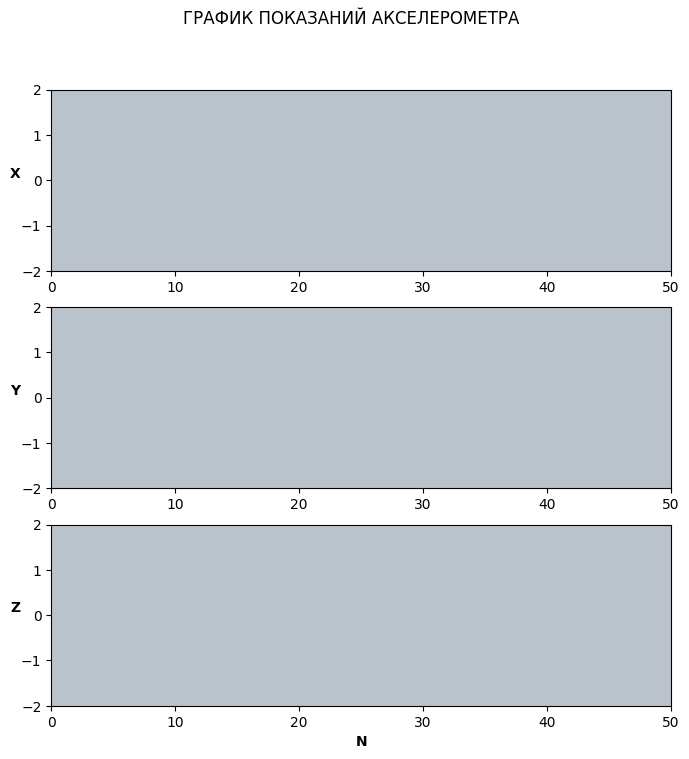

In [14]:
def UpdateGraph(frame):

    global cur_number
    cur_number=cur_number+1
    y.append(random.randint(5,10))
    
    if len(y)>40 :
        y.pop(0)
    else:
        x.append(cur_number)
    
    UpdatePropertyAxes( opts )


figure_1, ax_1 = CreateVectorFigure(options_1)
anim = an.FuncAnimation(fig=figure_1, func=UpdateGraph, frames=50, interval=500)
plt.show()